## Transformacion del dataset

In [82]:
import pandas as pd
import numpy as np

In [106]:
#Asignar tipo de dato fecha y separador ;
df = pd.read_csv(r'C:\Users\mauri\OneDrive\Escritorio\Henry_prueba\modulo5\integrador\Call_Center_1999_DataSet.csv', sep=';', header=0, parse_dates=['date'])

C:\Users\mauri\AppData\Local\Temp\ipykernel_9784\304165629.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\mauri\OneDrive\Escritorio\Henry_prueba\modulo5\integrador\Call_Center_1999_DataSet.csv', sep=';', header=0, parse_dates=['date'])


In [109]:
df.describe()

,call_id,priority,date,vru_time,q_time,ser_time,startdate
count,444448.000000,444448.000000,444448,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,0.907483,1999-07-06 09:55:09.633522944,10.286081,59.004304,152.561776,172.333974
min,1169.000000,0.000000,1999-01-01 00:00:00,-362.000000,0.000000,0.000000,0.000000
25%,21449.000000,0.000000,1999-04-11 00:00:00,6.000000,0.000000,12.000000,90.000000
50%,35256.000000,1.000000,1999-07-06 00:00:00,8.000000,16.000000,84.000000,181.000000
75%,42803.000000,2.000000,1999-10-07 00:00:00,10.000000,79.000000,185.000000,273.000000
max,55656.000000,2.000000,1999-12-31 00:00:00,4832.000000,28693.000000,61437.000000,334.000000
std,13945.516813,0.838148,NaN,34.942136,119.470328,282.372761,104.559247


In [89]:
#Crear copia por si hago errores.
df1 = df.copy()

In [95]:
#Sample como un head pero muestra distintos valores cada vez
#df.sample(5)
df.head(5)


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,0:0:5,0:00:36,0:03:09,0:2:33,HANG,0:00:00,0:00:00,0:0:0,NO_SERVER,0
1,AA0101,33117,0,0,PS,1999-01-01,0:34:12,0:34:23,0:0:11,0:00:00,0:00:00,0:0:0,HANG,0:00:00,0:00:00,0:0:0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,0:0:6,6:55:26,6:55:43,0:0:17,AGENT,6:55:43,6:56:37,0:0:54,MICHAL,0
3,AA0101,33119,0,0,PS,1999-01-01,7:41:16,7:41:26,0:0:10,0:00:00,0:00:00,0:0:0,AGENT,7:41:25,7:44:53,0:3:28,BASCH,0
4,AA0101,33120,0,0,PS,1999-01-01,8:03:14,8:03:24,0:0:10,0:00:00,0:00:00,0:0:0,AGENT,8:03:23,8:05:10,0:1:47,MICHAL,0


In [91]:
#La diferencia de vru_entry y exit esta medida en segundos y con numeros negativos. por ende hay que corregir eso.
mostrar_negativos_vt = df.vru_time.value_counts(ascending=True)
def second_to_time(second):
    sign = '-' if second < 0 else ''
    second = abs(second)
    hour = second // 3600
    minute = (second % 3600) // 60
    secs = second % 60
    return f'{sign}{hour}:{minute}:{secs}'

#Aplicar la funcion en las 3 medidas con segundos negativos
df['vru_time'] = df['vru_time'].apply(second_to_time)
df['q_time'] = df['q_time'].apply(second_to_time)
df['ser_time'] = df['ser_time'].apply(second_to_time)

In [107]:
#Reemplazar Nulos por 0 para convertir a numerico y eliminar decimales 
mostrar_nulos_ci = df.customer_id.value_counts()
df['customer_id'] = df['customer_id'].replace(0.0,0)
df['customer_id'] = df['customer_id'].replace(' ',0)
df['customer_id'] = df['customer_id'].replace(np.nan,0)
df['customer_id'] = df['customer_id'].replace(',', '.')
#df['customer_id'] = pd.to_numeric(df['customer_id'])
#df['customer_id'] = df['customer_id'].astype('Int64')

#la columna type contiene espacios que duplican valores 
df.type.value_counts()
df['type'] = df['type'].str.strip()
#Lo mismo para server 
df['server'] = df['server'].str.strip()


#Todavía hay clientes con prioridad 0, pero son tratados como si fueran de prioridad 1. 
df.loc[(df['priority'] == 0) & (df['customer_id'] != 0), 'priority'] = 1 
df.iloc[3296] # Ejemplo de como se aplico el cambio de prioridad en un cliente 

vru.line                    AA0104
call_id                      20893
customer_id         327000000000.0
priority                         1
type                            PE
date           1999-01-04 00:00:00
vru_entry                 14:55:28
vru_exit                  14:55:31
vru_time                         3
q_start                   14:55:31
q_exit                    14:56:39
q_time                          68
outcome                      AGENT
ser_start                 14:56:37
ser_exit                  14:56:40
ser_time                         3
server                      MICHAL
startdate                        0
Name: 3296, dtype: object

## EDA

In [108]:
#No se dio el servicio. averiguar la razon 
df2 = df[['type','outcome','server']]
df2 = df2[df2['outcome'] == 'HANG']
df2 = df2[df2['server'] != 'NO_SERVER']
df2.head(5)
#df.loc[(df['outcome'] == 'HANG') & (df['server'] != 'NO_SERVER'), 'server'] = 'NO_SERVER'

,type,outcome,server
12274,NW,HANG,DARMON
120628,PS,HANG,YITZ
122110,PS,HANG,YIFAT
191427,PS,HANG,VICKY
266186,PS,HANG,AVI


In [91]:
#Hay tiempos de espera(q) muy altos. averiguar la razon
df3 = df[df['q_time']> 1000]
df3.head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
3840,AA0115,12261,57831349,2,NE,1999-01-04,13:12:42,13:12:48,6,13:12:48,13:31:56,1148,HANG,0:00:00,0:00:00,0,NO_SERVER,0
4642,AA0214,12251,54128681,2,PS,1999-01-04,13:40:17,13:40:22,5,13:40:22,14:05:22,1500,AGENT,14:05:22,14:06:52,90,YIFAT,0
4735,AA0215,11815,0,0,NE,1999-01-04,13:06:08,13:06:17,9,13:06:17,13:35:49,1772,PHANTOM,13:35:48,13:36:04,16,NO_SERVER,0
12130,AA0101,33726,27345180,2,PS,1999-01-13,9:34:35,9:34:41,6,9:34:41,9:58:41,1440,HANG,0:00:00,0:00:00,0,NO_SERVER,0
12211,AA0102,29064,317882355,1,PS,1999-01-13,9:34:50,9:34:56,6,9:34:56,9:58:41,1425,HANG,0:00:00,0:00:00,0,NO_SERVER,0


In [ ]:
#Hay tiempos de bot en negativo. averiguar la razon
df4 = df[df['vru_time'] < 0]
df4.head(5)

In [98]:
df.describe()
# los tiempos de espera q_ y de servicio ser_ presentan una desviacion muy alta del promedio

,call_id,priority,date,startdate
count,444448.000000,444448.000000,444448,444448.000000
mean,31928.737202,0.907483,1999-07-06 09:55:09.633522944,172.333974
min,1169.000000,0.000000,1999-01-01 00:00:00,0.000000
25%,21449.000000,0.000000,1999-04-11 00:00:00,90.000000
50%,35256.000000,1.000000,1999-07-06 00:00:00,181.000000
75%,42803.000000,2.000000,1999-10-07 00:00:00,273.000000
max,55656.000000,2.000000,1999-12-31 00:00:00,334.000000
std,13945.516813,0.838148,NaN,104.559247


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   vru.line     444448 non-null  object        
 1   call_id      444448 non-null  int64         
 2   customer_id  444448 non-null  object        
 3   priority     444448 non-null  int64         
 4   type         444448 non-null  object        
 5   date         444448 non-null  datetime64[ns]
 6   vru_entry    444448 non-null  object        
 7   vru_exit     444448 non-null  object        
 8   vru_time     444448 non-null  int64         
 9   q_start      444448 non-null  object        
 10  q_exit       444448 non-null  object        
 11  q_time       444448 non-null  int64         
 12  outcome      444448 non-null  object        
 13  ser_start    444448 non-null  object        
 14  ser_exit     444448 non-null  object        
 15  ser_time     444448 non-null  int6

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

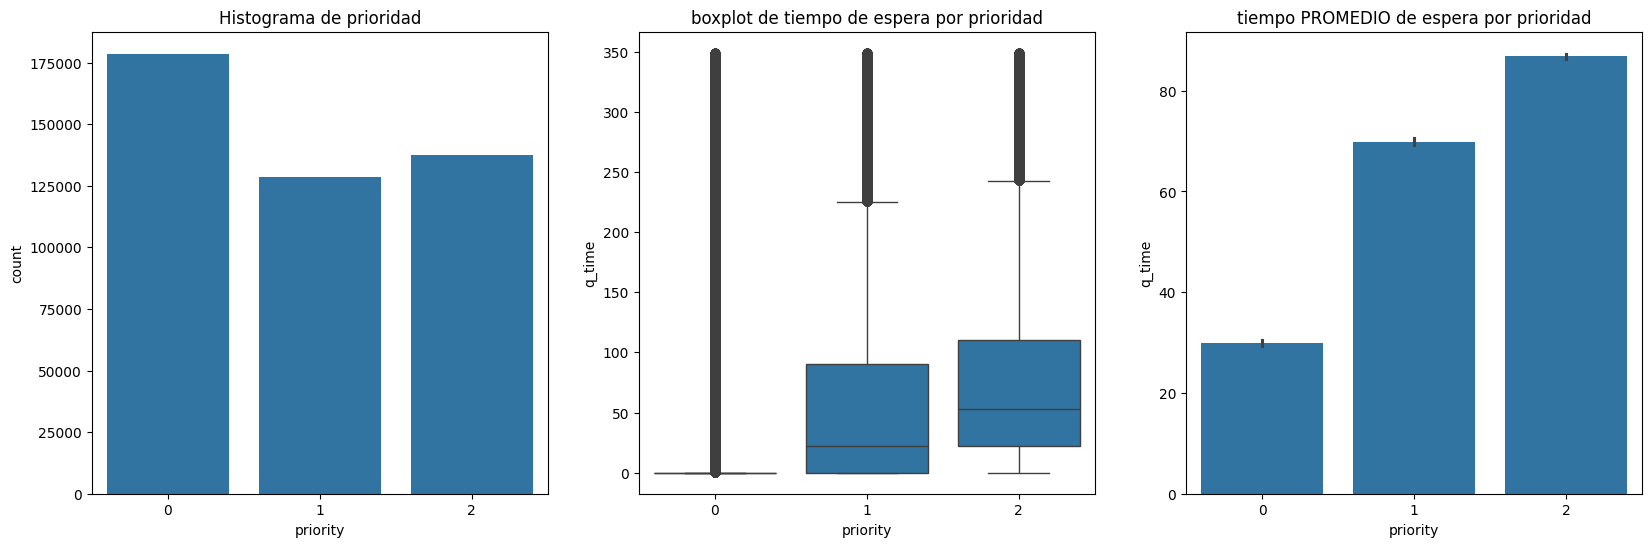

In [97]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

ax[0].set(title='Histograma de prioridad')
sns.countplot(x='priority', data=df, ax=ax[0])

ax[1].set(title='boxplot de tiempo de espera por prioridad')
q_time350 = df[df['q_time'] < 350]
sns.boxplot(x='priority', y='q_time', data=q_time350, ax=ax[1])

ax[2].set(title='tiempo PROMEDIO de espera por prioridad')
sns.barplot(x='priority', y='q_time', data=df, ax=ax[2])

plt.show()

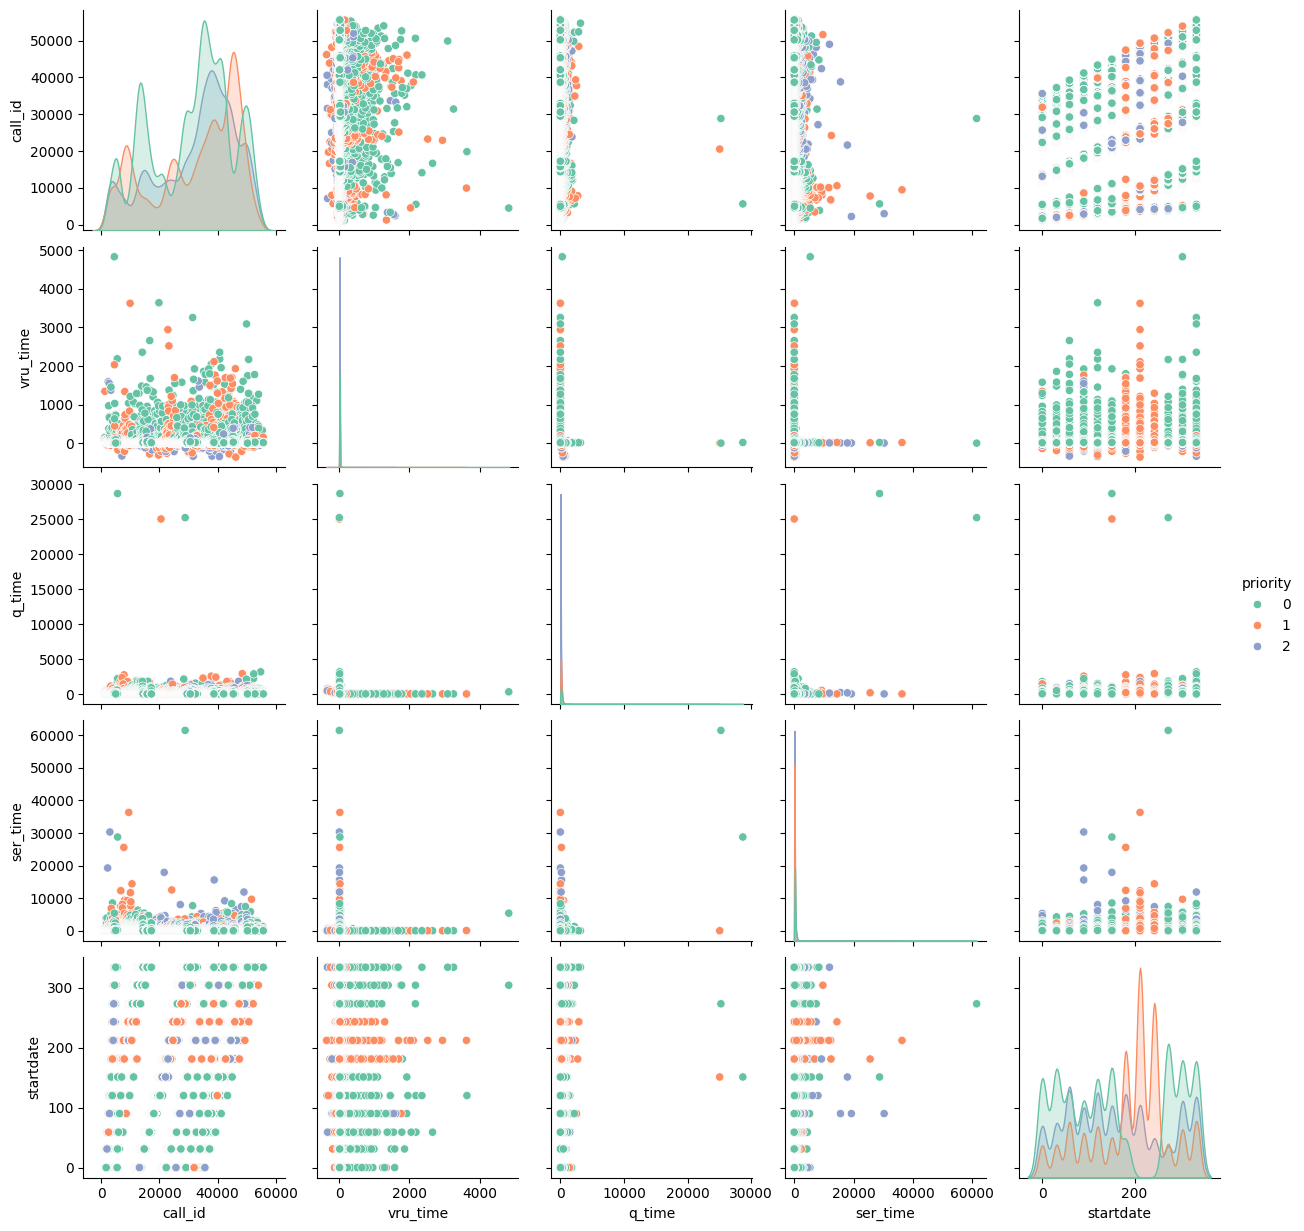

In [57]:
sns.pairplot(data=df, hue='priority', palette='Set2')

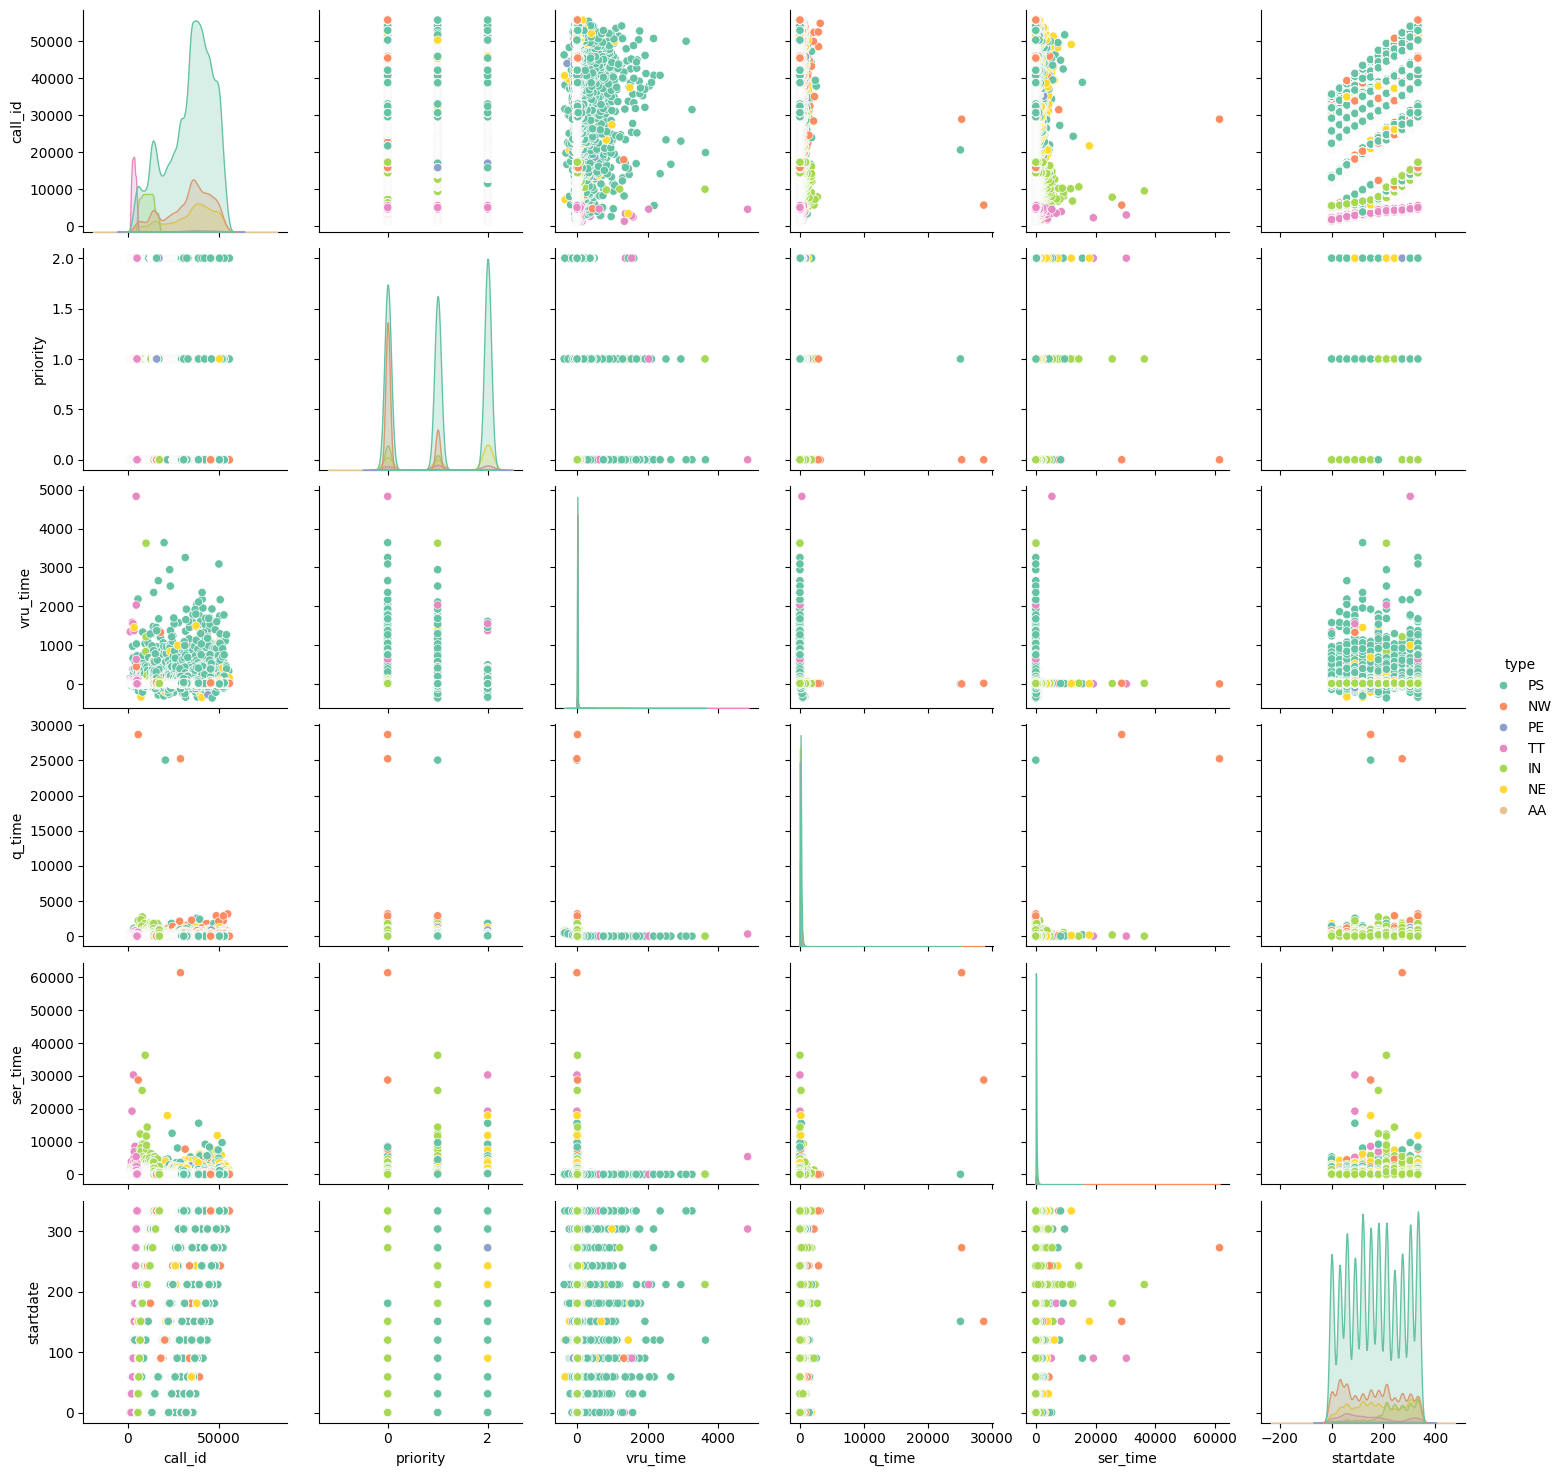

In [12]:
sns.pairplot(data=df, hue='type',palette='Set2')

En el pairplot de arriba se logra ver que a los clientes potenciales (NW). Marcan outliers en tiempo de servicio y espera. 

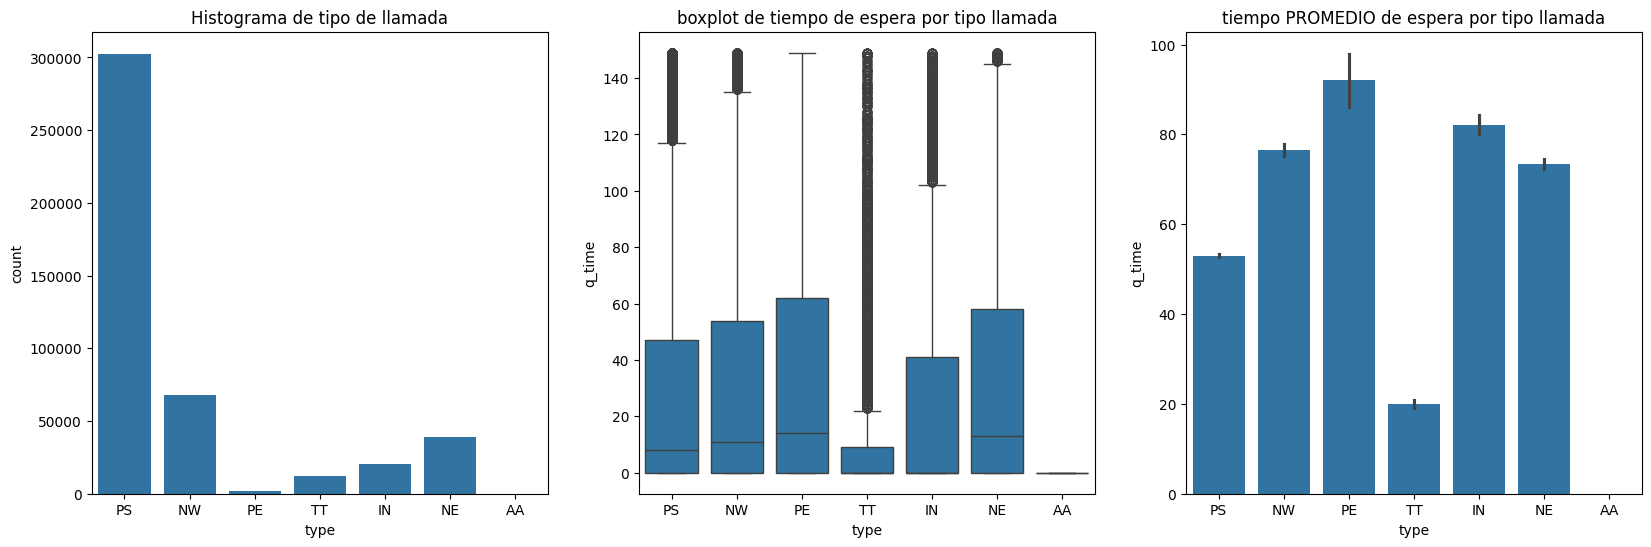

In [14]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

ax[0].set(title='Histograma de tipo de llamada')
sns.countplot(x='type', data=df, ax=ax[0])

ax[1].set(title='boxplot de tiempo de espera por tipo llamada')
q_time150 = df[df['q_time'] < 150]
sns.boxplot(x='type', y='q_time', data=q_time150, ax=ax[1])

ax[2].set(title='tiempo PROMEDIO de espera por tipo llamada')
sns.barplot(x='type', y='q_time', data=df, ax=ax[2])

plt.show()

Hay 6 tipos diferentes de servicio:
- PS - Actividad Regular
- PE - Actividad Regular en inglés
- IN - Actividad / Consulta por internet
- NE - Actividad por Acciones (stock exchange)
- NW - Cliente potencial (prospecto) solicitando información
- TT – clientes que dejan un mensaje pidiendo al banco que le devuelvan su llamado pero que cuando el sistema automático devuelve el llamado, el agente pasó a estado “ocupado”, dejando al cliente en espera en la cola.


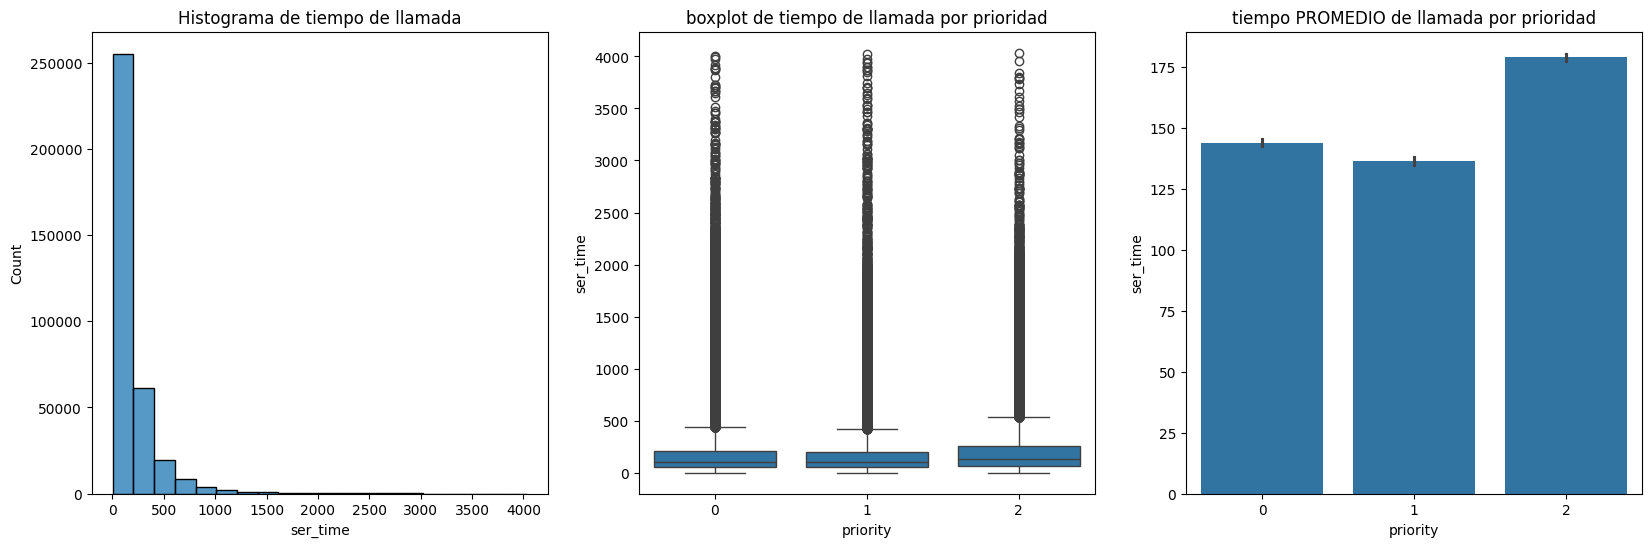

In [121]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

ser_time350 = df[(df['ser_time'] > 1) & (df['ser_time'] < 2050)]
ax[0].set(title='Histograma de tiempo de llamada')
sns.histplot(x='ser_time', data=ser_time350, bins=20, ax=ax[0])

ax[1].set(title='boxplot de tiempo de llamada por prioridad')
sns.boxplot(x='priority', y='ser_time', data=ser_time350, ax=ax[1])

ax[2].set(title='tiempo PROMEDIO de llamada por prioridad')
sns.barplot(x='priority', y='ser_time', data=df, ax=ax[2])

plt.show()

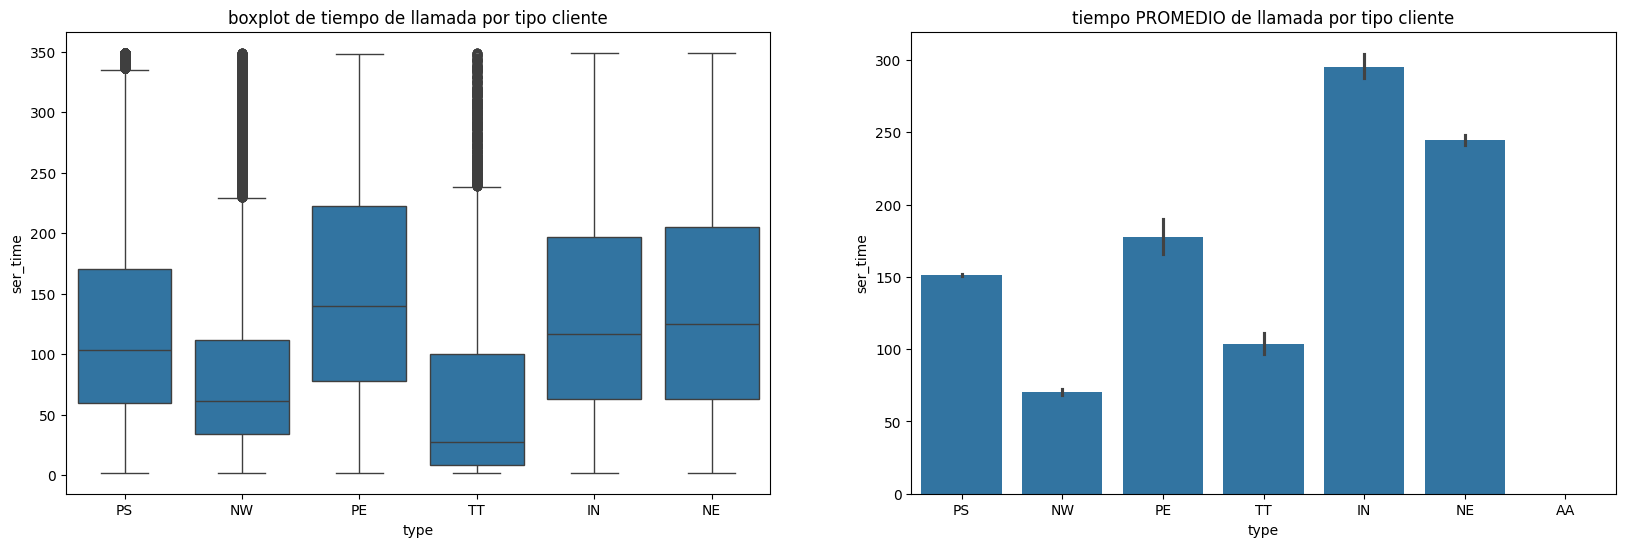

In [36]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ser_time350 = df[(df['ser_time'] > 1) & (df['ser_time'] < 350)]


ax[0].set(title='boxplot de tiempo de llamada por tipo cliente')
sns.boxplot(x='type', y='ser_time', data=ser_time350, ax=ax[0])

ax[1].set(title='tiempo PROMEDIO de llamada por tipo cliente')
sns.barplot(x='type', y='ser_time', data=df, ax=ax[1])

plt.show()

<Axes: title={'center': 'tiempo PROMEDIO en bot por tipo llamada'}, xlabel='type', ylabel='vru_time'>

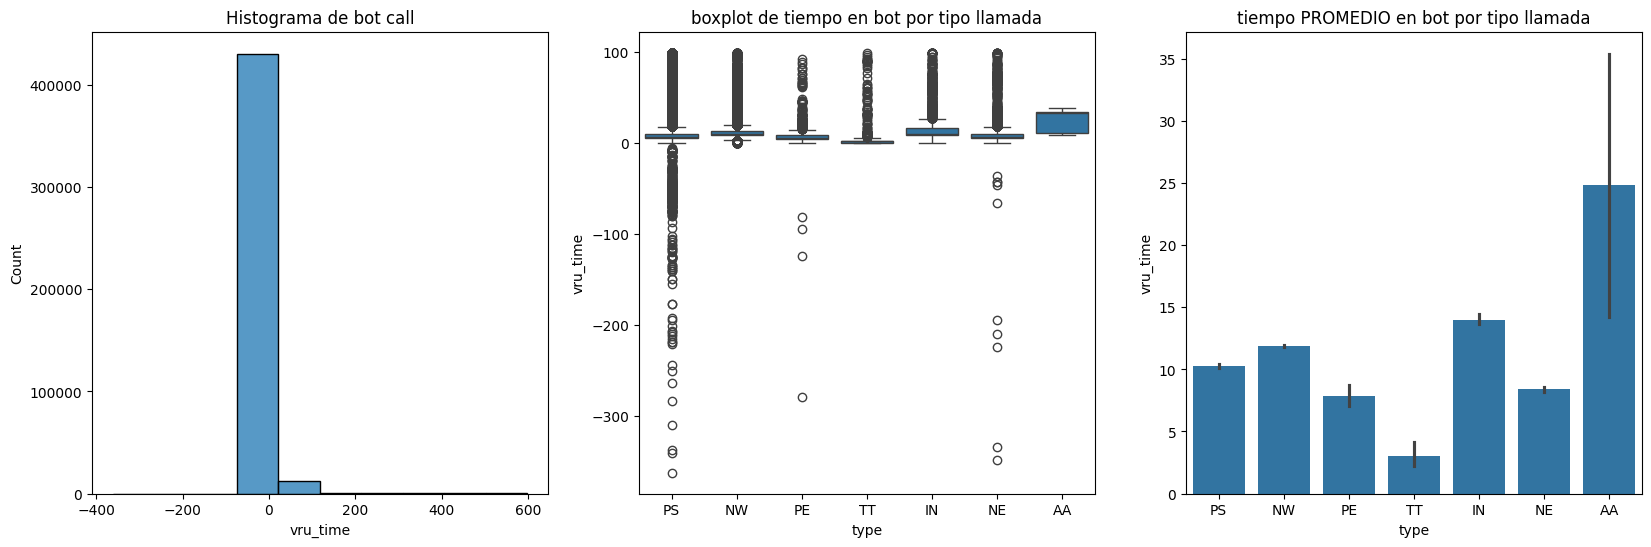

In [48]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
vru_time600 = df[df['vru_time'] < 600]

ax[0].set(title='Histograma de bot call')
sns.histplot(x='vru_time', data=vru_time600, bins=10, ax=ax[0])

ax[1].set(title='boxplot de tiempo en bot por tipo llamada')
vru_time100 = df[df['vru_time'] < 100]
sns.boxplot(x='type', y='vru_time', data=vru_time100, ax=ax[1])

ax[2].set(title='tiempo PROMEDIO en bot por tipo llamada')
sns.barplot(x='type', y='vru_time', data=df, ax=ax[2])


In [97]:
columnas_deseadas = ['call_id', 'vru_time']

# Seleccionar solo las columnas deseadas
df_filtrado = df[columnas_deseadas]

# Guardar el DataFrame filtrado en un archivo CSV
df_filtrado.to_csv('formateado.csv', index=False)
